In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
import os
import os.path
from pathlib import Path
import glob


In [3]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage import convolve
from skimage import data, io, filters

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

In [6]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D,AveragePooling2D,Input, GlobalMaxPooling2D, Conv2DTranspose, Reshape
from keras import models
from keras import layers
from keras import Input
from keras.models import Model              wwwwww
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras.regularizers import l1,l2,L1L2
from tensorflow.keras import regularizers

from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [7]:
Mars_Train_csv = pd.read_csv(r"E:\PycharmProjects\MArs\Mars Surface and Curiosity Image\Train_CSV.csv")
Mars_Test_csv = pd.read_csv(r"E:\PycharmProjects\MArs\Mars Surface and Curiosity Image\Test_CSV.csv")
Mars_Validation_csv = pd.read_csv(r"E:\PycharmProjects\MArs\Mars Surface and Curiosity Image\Validation_CSV.csv")

In [8]:
print(Mars_Train_csv.head(-1))

                                                JPG  LABELS
0     calibrated/0077ML0005780000102730I01_DRCL.JPG      15
1     calibrated/0072MR0005610170103642E01_DRCL.JPG       8
2     calibrated/0069MR0004130000103477I01_DRCL.JPG      21
3     calibrated/0154ML0008510010104492E01_DRCL.JPG       8
4     calibrated/0019MR0000530000100138C00_DRCL.JPG       8
...                                             ...     ...
3740  calibrated/0078MR0005760370103872E01_DRCL.JPG       8
3741  calibrated/0163ML0008760050104602D01_DRCL.JPG      10
3742  calibrated/0072MR0005620000103655E01_DRCL.JPG       8
3743  calibrated/0066ML0003650000102517M00_DRCL.JPG      21
3744  calibrated/0157ML0008550020104531I01_DRCL.JPG       8

[3745 rows x 2 columns]


In [9]:
print(Mars_Test_csv.head(-1))

                                                JPG  LABELS
0     calibrated/0830MR0036510000500684E01_DRCL.JPG       7
1     calibrated/0640MH0002640000203781I01_DRCL.JPG      24
2     calibrated/0647MH0003250050203806E01_DRCL.JPG       9
3     calibrated/0844MR0037590000501001I01_DRCL.JPG       7
4     calibrated/0618MR0026460020401253I01_DRCL.JPG      11
...                                             ...     ...
1299  calibrated/0894MR0039190000501251E01_DRCL.JPG       0
1300  calibrated/0571MH0002590000201894I01_DRCL.JPG      24
1301  calibrated/0840ML0037090000401385I01_DRCL.JPG      17
1302  calibrated/0868MH0003900000302200I01_DRCL.JPG      10
1303  calibrated/0568MH0002630000201882E01_DRCL.JPG      24

[1304 rows x 2 columns]


In [10]:
print(Mars_Validation_csv.head(-1))

                                                JPG  LABELS
0     calibrated/0292MH0002810020103587C00_DRCL.JPG       5
1     calibrated/0270MH0002530050102760I01_DRCL.JPG       5
2     calibrated/0549MH0002620000201566E01_DRCL.JPG      24
3     calibrated/0229MR0009720000202913E01_DRCL.JPG       0
4     calibrated/0292MH0002810020103613C00_DRCL.JPG       5
...                                             ...     ...
1634  calibrated/0283MH0002730050103243I01_DRCL.JPG       5
1635  calibrated/0486MR0011580000302944E01_DRCL.JPG       0
1636  calibrated/0506MH0002240020200655I01_DRCL.JPG       8
1637  calibrated/0229MR0010840000202939I01_DRCL.JPG      16
1638  calibrated/0229MR0009760000202918I01_DRCL.JPG      18

[1639 rows x 2 columns]


In [11]:
def new_path_function(jpg_path,jpg_labels,new_jpg_list,new_label_list,splitting_string = "calibrated"):
    
    for image_path, path_label in zip(jpg_path,jpg_labels):
        ID_pathing,exporting_type = image_path.split(splitting_string)
        New_File_Path_Name = "E:\PycharmProjects\MArs\Mars Surface and Curiosity Image\images" + str(exporting_type)
        new_jpg_list.append(New_File_Path_Name)
        new_label_list.append(path_label)

In [12]:
New_JPG_Path_Train = []
New_Labels_Train = []
splitting_string = "calibrated"

new_path_function(Mars_Train_csv.JPG,Mars_Train_csv.LABELS,New_JPG_Path_Train,New_Labels_Train,splitting_string)

In [13]:
New_JPG_Path_Test = []
New_Labels_Test = []
splitting_string = "calibrated"

new_path_function(Mars_Test_csv.JPG,Mars_Test_csv.LABELS,New_JPG_Path_Test,New_Labels_Test,splitting_string)

In [14]:
New_JPG_Path_Validation = []
New_Labels_Validation = []
splitting_string = "calibrated"

new_path_function(Mars_Validation_csv.JPG,Mars_Validation_csv.LABELS,New_JPG_Path_Validation,New_Labels_Validation,splitting_string)

In [15]:
Train_JPG_Series = pd.Series(New_JPG_Path_Train,name="JPG").astype(str)
Train_Labels_Series = pd.Series(New_Labels_Train,name="CATEGORY")

In [16]:
Test_JPG_Series = pd.Series(New_JPG_Path_Test,name="JPG").astype(str)
Test_Labels_Series = pd.Series(New_Labels_Test,name="CATEGORY")

In [17]:
Validation_JPG_Series = pd.Series(New_JPG_Path_Validation,name="JPG").astype(str)
Validation_Labels_Series = pd.Series(New_Labels_Validation,name="CATEGORY")

In [18]:
Main_Train_Data = pd.concat([Train_JPG_Series,Train_Labels_Series],axis=1)

In [19]:
print(Main_Train_Data.head(-1))

                                                    JPG  CATEGORY
0     E:\PycharmProjects\MArs\Mars Surface and Curio...        15
1     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
2     E:\PycharmProjects\MArs\Mars Surface and Curio...        21
3     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
4     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
...                                                 ...       ...
3740  E:\PycharmProjects\MArs\Mars Surface and Curio...         8
3741  E:\PycharmProjects\MArs\Mars Surface and Curio...        10
3742  E:\PycharmProjects\MArs\Mars Surface and Curio...         8
3743  E:\PycharmProjects\MArs\Mars Surface and Curio...        21
3744  E:\PycharmProjects\MArs\Mars Surface and Curio...         8

[3745 rows x 2 columns]


In [20]:
Main_Test_Data = pd.concat([Test_JPG_Series,Test_Labels_Series],axis=1)

In [21]:
print(Main_Test_Data.head(-1))

                                                    JPG  CATEGORY
0     E:\PycharmProjects\MArs\Mars Surface and Curio...         7
1     E:\PycharmProjects\MArs\Mars Surface and Curio...        24
2     E:\PycharmProjects\MArs\Mars Surface and Curio...         9
3     E:\PycharmProjects\MArs\Mars Surface and Curio...         7
4     E:\PycharmProjects\MArs\Mars Surface and Curio...        11
...                                                 ...       ...
1299  E:\PycharmProjects\MArs\Mars Surface and Curio...         0
1300  E:\PycharmProjects\MArs\Mars Surface and Curio...        24
1301  E:\PycharmProjects\MArs\Mars Surface and Curio...        17
1302  E:\PycharmProjects\MArs\Mars Surface and Curio...        10
1303  E:\PycharmProjects\MArs\Mars Surface and Curio...        24

[1304 rows x 2 columns]


In [22]:
Main_Validation_Data = pd.concat([Validation_JPG_Series,Validation_Labels_Series],axis=1)
print(Main_Validation_Data.head(-1))

                                                    JPG  CATEGORY
0     E:\PycharmProjects\MArs\Mars Surface and Curio...         5
1     E:\PycharmProjects\MArs\Mars Surface and Curio...         5
2     E:\PycharmProjects\MArs\Mars Surface and Curio...        24
3     E:\PycharmProjects\MArs\Mars Surface and Curio...         0
4     E:\PycharmProjects\MArs\Mars Surface and Curio...         5
...                                                 ...       ...
1634  E:\PycharmProjects\MArs\Mars Surface and Curio...         5
1635  E:\PycharmProjects\MArs\Mars Surface and Curio...         0
1636  E:\PycharmProjects\MArs\Mars Surface and Curio...         8
1637  E:\PycharmProjects\MArs\Mars Surface and Curio...        16
1638  E:\PycharmProjects\MArs\Mars Surface and Curio...        18

[1639 rows x 2 columns]


In [23]:
frame_list = [Main_Train_Data,Main_Test_Data,Main_Train_Data]



In [24]:
Main_Mars_Data = pd.concat(frame_list)
print(Main_Mars_Data.head(-1))

                                                    JPG  CATEGORY
0     E:\PycharmProjects\MArs\Mars Surface and Curio...        15
1     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
2     E:\PycharmProjects\MArs\Mars Surface and Curio...        21
3     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
4     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
...                                                 ...       ...
3740  E:\PycharmProjects\MArs\Mars Surface and Curio...         8
3741  E:\PycharmProjects\MArs\Mars Surface and Curio...        10
3742  E:\PycharmProjects\MArs\Mars Surface and Curio...         8
3743  E:\PycharmProjects\MArs\Mars Surface and Curio...        21
3744  E:\PycharmProjects\MArs\Mars Surface and Curio...         8

[8796 rows x 2 columns]


In [25]:
Main_Mars_Data = Main_Mars_Data.sample(frac=1).reset_index(drop=True)
print(Main_Mars_Data.head(-1))

                                                    JPG  CATEGORY
0     E:\PycharmProjects\MArs\Mars Surface and Curio...        24
1     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
2     E:\PycharmProjects\MArs\Mars Surface and Curio...         9
3     E:\PycharmProjects\MArs\Mars Surface and Curio...        21
4     E:\PycharmProjects\MArs\Mars Surface and Curio...         8
...                                                 ...       ...
8791  E:\PycharmProjects\MArs\Mars Surface and Curio...         9
8792  E:\PycharmProjects\MArs\Mars Surface and Curio...        21
8793  E:\PycharmProjects\MArs\Mars Surface and Curio...        20
8794  E:\PycharmProjects\MArs\Mars Surface and Curio...         8
8795  E:\PycharmProjects\MArs\Mars Surface and Curio...         8

[8796 rows x 2 columns]


In [26]:
def threshold_function(image_path):
    
    Picking_IMG = image_path
    Picking_IMG = cv2.cvtColor(cv2.imread(Picking_IMG),cv2.COLOR_BGR2RGB)
    _,Threshold_IMG = cv2.threshold(Picking_IMG,200,255,cv2.THRESH_BINARY_INV)
    
    plt.xlabel(Threshold_IMG.shape)
    plt.ylabel(Threshold_IMG.size)
    plt.imshow(Threshold_IMG)

In [27]:
def simple_vision(image_path):
    
    Picking_IMG = image_path
    Picking_IMG = cv2.cvtColor(cv2.imread(Picking_IMG),cv2.COLOR_BGR2RGB)
    
    plt.xlabel(Picking_IMG.shape)
    plt.ylabel(Picking_IMG.size)
    plt.imshow(Picking_IMG)

In [28]:
def just_vision(image_path):
    
    plt.xlabel(image_path.shape)
    plt.ylabel(image_path.size)
    plt.imshow(image_path)

In [29]:
def just_threshold(image_path):
    
    _,threshold_IMG = cv2.threshold(image_path,220,255,cv2.THRESH_BINARY_INV)
    
    plt.xlabel(threshold_IMG.shape)
    plt.ylabel(threshold_IMG.size)
    plt.imshow(threshold_IMG)

In [30]:
def just_canny(image_path):
    
    Canny_Image = cv2.Canny(image_path,10,100)
    
    plt.xlabel(Canny_Image.shape)
    plt.ylabel(Canny_Image.size)
    plt.imshow(Canny_Image)
def just_drawing_contour(image_path):
    
    Canny_Image = cv2.Canny(image_path,10,100)
    contour,_ = cv2.findContours(Canny_Image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    Drawing_Contour = cv2.drawContours(image_path,contour,-1,(255,0,0),2)
    
    plt.xlabel(Drawing_Contour.shape)
    plt.ylabel(Drawing_Contour.size)
    plt.imshow(Drawing_Contour)

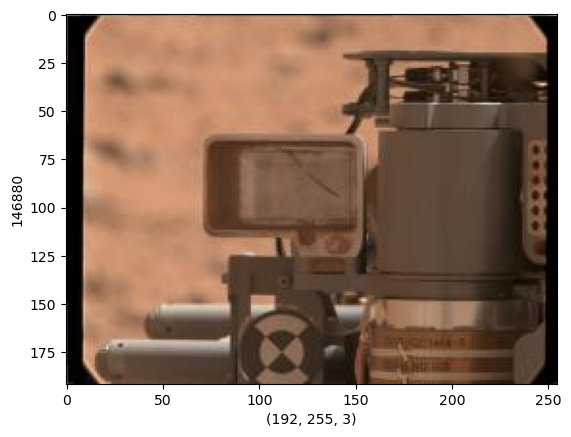

In [31]:
simple_vision(Main_Mars_Data["JPG"][3])

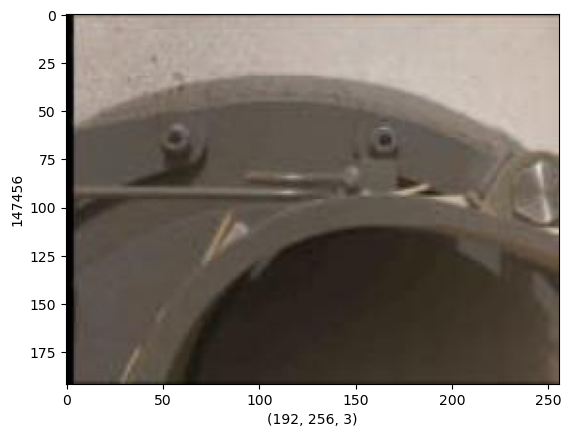

In [32]:
simple_vision(Main_Mars_Data["JPG"][30])

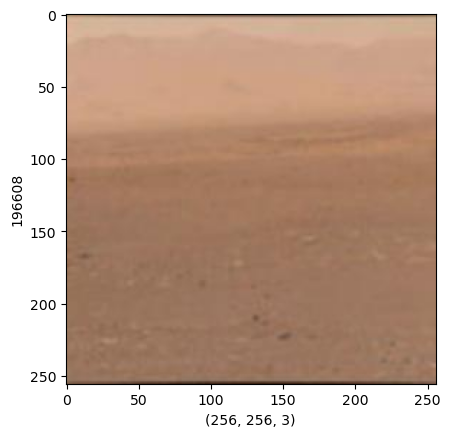

In [33]:
simple_vision(Main_Mars_Data["JPG"][4560])

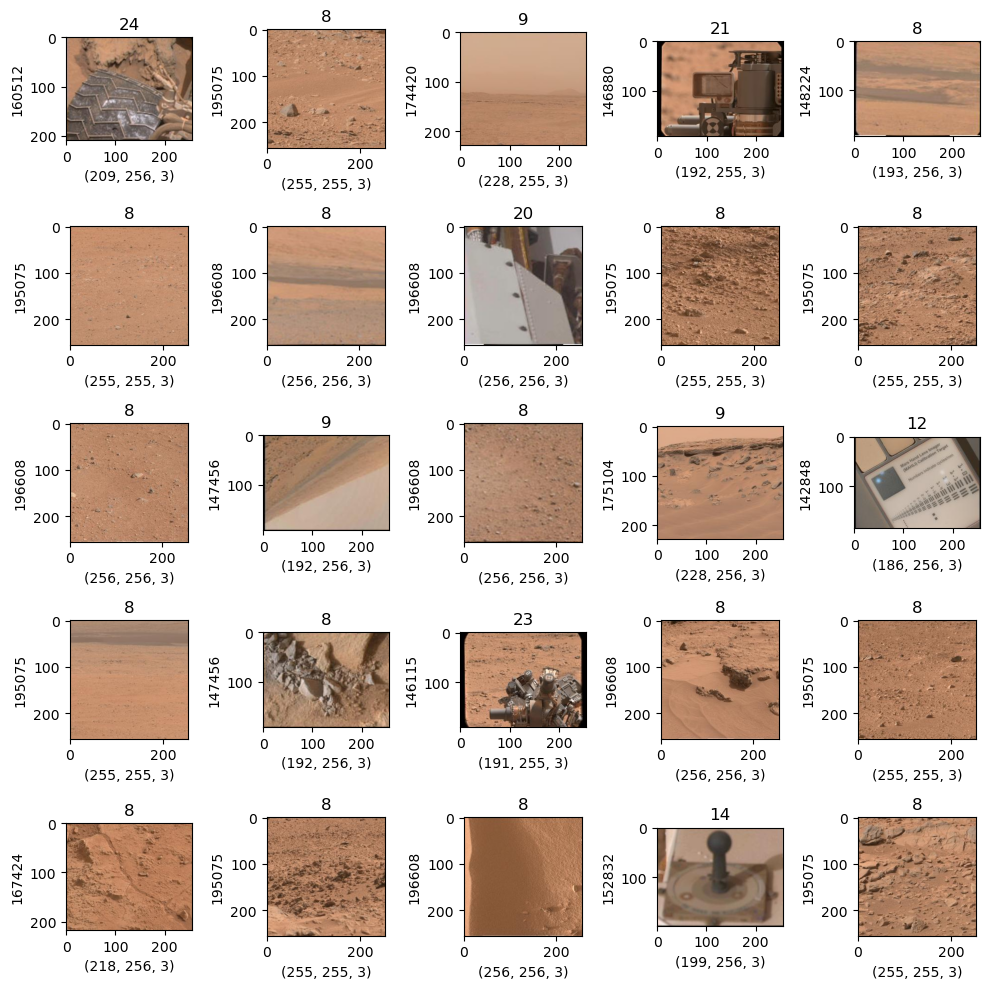

In [34]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operation in enumerate(axis.flat):
    
    Picking_Image = Main_Mars_Data["JPG"][indexing]
    Reading_Image = cv2.cvtColor(cv2.imread(Picking_Image),cv2.COLOR_BGR2RGB)
    
    operation.set_xlabel(Reading_Image.shape)
    operation.set_ylabel(Reading_Image.size)
    operation.set_title(Main_Mars_Data["CATEGORY"][indexing])
    operation.imshow(Reading_Image)
    
plt.tight_layout()
plt.show()

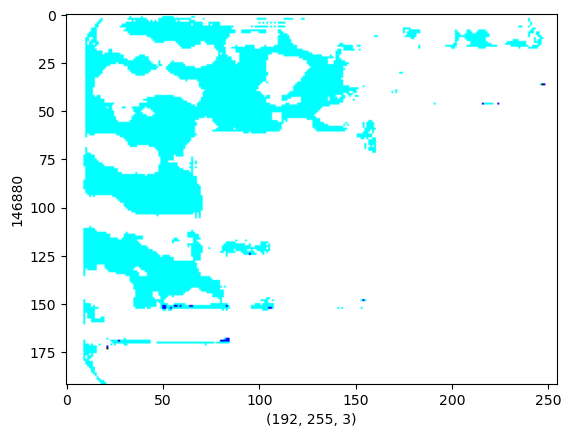

In [35]:
threshold_function(Main_Mars_Data["JPG"][3])

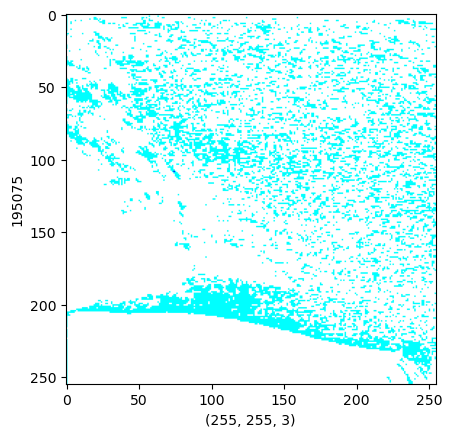

In [36]:
threshold_function(Main_Mars_Data["JPG"][44])


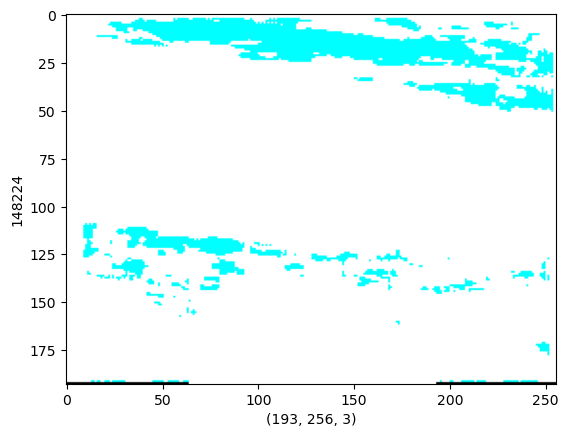

In [37]:
threshold_function(Main_Mars_Data["JPG"][400])


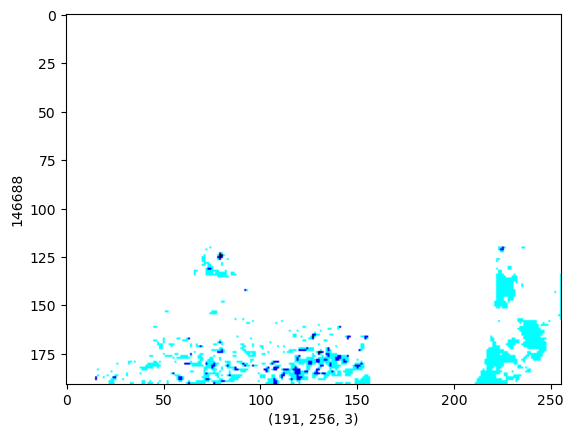

In [38]:
threshold_function(Main_Mars_Data["JPG"][827])

In [39]:
Another_Mars_Path = Path(r"../Mars Surface and Curiosity Image/additional_images")

In [40]:
Another_JPG_List = list(Another_Mars_Path.glob(r"*.jpg"))
Another_JPG_Series = pd.Series(Another_JPG_List,name="JPG").astype(str)
print(Another_JPG_Series.head(-1))

0        ..\Mars Surface and Curiosity Image\additional...
1        ..\Mars Surface and Curiosity Image\additional...
2        ..\Mars Surface and Curiosity Image\additional...
3        ..\Mars Surface and Curiosity Image\additional...
4        ..\Mars Surface and Curiosity Image\additional...
                               ...                        
32362    ..\Mars Surface and Curiosity Image\additional...
32363    ..\Mars Surface and Curiosity Image\additional...
32364    ..\Mars Surface and Curiosity Image\additional...
32365    ..\Mars Surface and Curiosity Image\additional...
32366    ..\Mars Surface and Curiosity Image\additional...
Name: JPG, Length: 32367, dtype: object


In [41]:
Another_JPG_Series = Another_JPG_Series[0:2000]
print(Another_JPG_Series.head(-1))

0       ..\Mars Surface and Curiosity Image\additional...
1       ..\Mars Surface and Curiosity Image\additional...
2       ..\Mars Surface and Curiosity Image\additional...
3       ..\Mars Surface and Curiosity Image\additional...
4       ..\Mars Surface and Curiosity Image\additional...
                              ...                        
1994    ..\Mars Surface and Curiosity Image\additional...
1995    ..\Mars Surface and Curiosity Image\additional...
1996    ..\Mars Surface and Curiosity Image\additional...
1997    ..\Mars Surface and Curiosity Image\additional...
1998    ..\Mars Surface and Curiosity Image\additional...
Name: JPG, Length: 1999, dtype: object


In [42]:
Transformed_X = []

for X_image in Another_JPG_Series:
    
    One_Image = cv2.cvtColor(cv2.imread(X_image),cv2.COLOR_BGR2RGB)
    One_Image = cv2.resize(One_Image,(180,180))
    One_Image = One_Image / 255.0
    Transformed_X.append(One_Image)


In [43]:
X_AE_Train = np.array(Transformed_X)
print(X_AE_Train.shape)

(2000, 180, 180, 3)


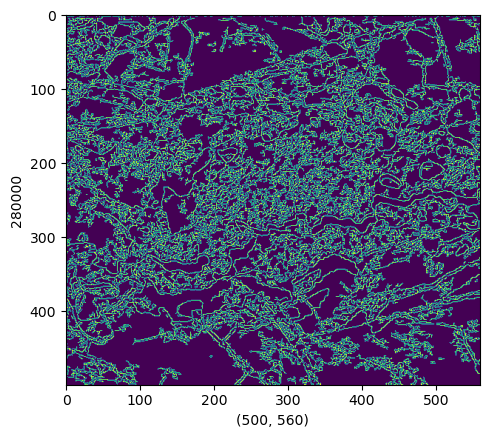

In [44]:
Reading_IMG = cv2.cvtColor(cv2.imread(Another_JPG_Series[0]),cv2.COLOR_BGR2RGB)

just_canny(Reading_IMG)

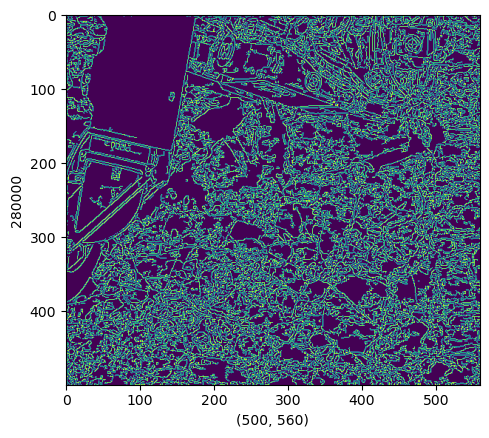

In [45]:
Reading_IMG = cv2.cvtColor(cv2.imread(Another_JPG_Series[200]),cv2.COLOR_BGR2RGB)

just_canny(Reading_IMG)

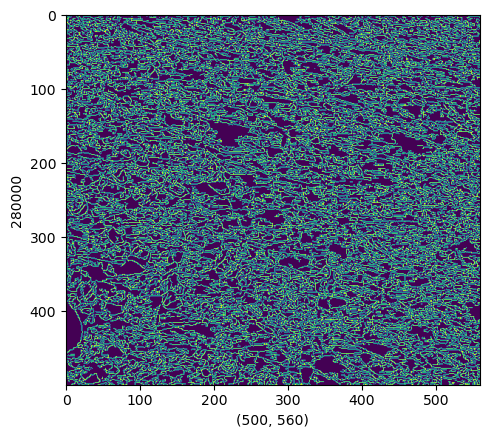

In [46]:
Reading_IMG = cv2.cvtColor(cv2.imread(Another_JPG_Series[600]),cv2.COLOR_BGR2RGB)

just_canny(Reading_IMG)

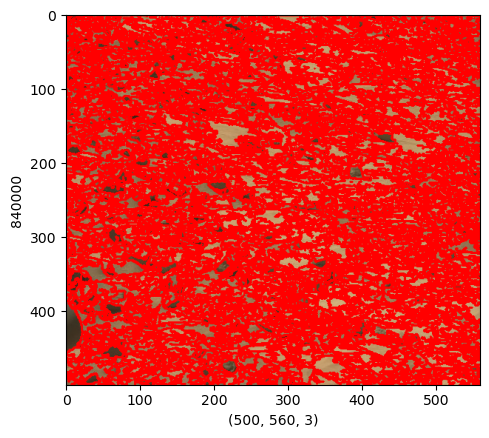

In [47]:
Reading_IMG = cv2.cvtColor(cv2.imread(Another_JPG_Series[600]),cv2.COLOR_BGR2RGB)

just_drawing_contour(Reading_IMG)

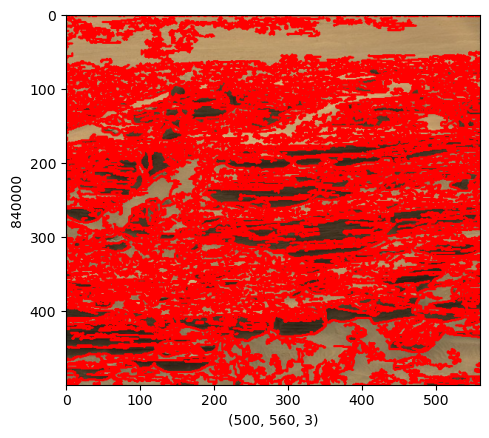

In [48]:
Reading_IMG = cv2.cvtColor(cv2.imread(Another_JPG_Series[1600]),cv2.COLOR_BGR2RGB)

just_drawing_contour(Reading_IMG)

In [49]:
X_Train,X_Test = train_test_split(Main_Mars_Data,train_size=0.9,random_state=42,shuffle=True)
print(X_Train.shape)
print(X_Test.shape)

(7917, 2)
(880, 2)


In [50]:
Validation_Set = X_Train[6000:7917]
X_Train = X_Train[0:2000]
Validation_Set = Validation_Set.reset_index()
print(X_Train.shape)
print(X_Test.shape)
print(Validation_Set.shape)

(2000, 2)
(880, 2)
(1917, 3)


In [51]:
print(X_Train.CATEGORY.value_counts())

8     1081
9      116
23      92
24      92
21      83
10      83
14      56
3       46
15      42
7       37
17      36
20      28
12      28
13      24
0       24
6       19
16      18
5       18
2       17
11      16
19      16
4       15
1       10
18       3
Name: CATEGORY, dtype: int64


In [52]:
Transformed_Y_Train = []
Transformed_Y_Train_Labels = []

for Y_image, Y_labels in zip(X_Train.JPG,X_Train.CATEGORY):
    
    Y_image = cv2.cvtColor(cv2.imread(Y_image),cv2.COLOR_BGR2RGB)
    Y_image = cv2.resize(Y_image,(180,180))
    Y_image = Y_image / 255.0
    Transformed_Y_Train.append(Y_image)
    Transformed_Y_Train_Labels.append(Y_labels)

In [53]:
Y_S_Train_Img = np.array(Transformed_Y_Train)
Y_S_Train_Labels = to_categorical(Transformed_Y_Train_Labels)

In [54]:
print(Y_S_Train_Img.shape)
print(Y_S_Train_Labels.shape)
print(X_AE_Train.shape)

(2000, 180, 180, 3)
(2000, 25)
(2000, 180, 180, 3)


In [55]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")
Reduce_Model = tf.keras.callbacks.ReduceLROnPlateau(monitor="accuracy",
                                                   factor=0.1,
                                                   patience=7)

In [56]:
Input_Layer = tf.keras.Input(shape=(180,180,3))
#
x = Conv2D(32,(3,3),activation="relu",padding="same")(Input_Layer)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(2,2),activation="relu",padding="same")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(256,(2,2),activation="relu",padding="same")(x)
x = GlobalMaxPooling2D()(x)
x = Dense(128,activation="relu")(x)
x = Dropout(0.5)(x)
class_prediction_layer = Dense(25,activation="softmax",name="CLASS_PREDICTION")(x)
#
encoder = Dense(128,activation="relu")(Input_Layer)
encoder = Dense(64,activation="relu")(encoder)
encoder = Dense(32,activation="relu")(encoder)
#
decoder = Dense(64,input_shape=[32],activation="relu")(encoder)
decoder = Dense(128,activation="relu")(decoder)
ae_output = Dense(3,activation="sigmoid",name="AE_OUTPUT")(decoder)
Configure_Model = Model(Input_Layer,[class_prediction_layer,ae_output])
print(Configure_Model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 180, 180, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 90, 90, 32)   0           ['conv2d[0][0]']                 
                                                                                              

In [57]:
plot_model(Configure_Model, to_file='Conf.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [58]:
Configure_Model.compile(optimizer="adam",loss={"CLASS_PREDICTION":"categorical_crossentropy",
                                              "AE_OUTPUT":"binary_crossentropy"},metrics=["accuracy"])


In [59]:
import time
start = time.time()
Model_Configure_Total = Configure_Model.fit(Y_S_Train_Img,
                    [Y_S_Train_Labels,X_AE_Train],
                    epochs=1,
                    batch_size=2,
                    callbacks=[Early_Stopper,Checkpoint_Model,Reduce_Model])
end = time.time()
total = end - start
print(total)

1000/1000 [==============================] - 47s 35ms/step - loss: 2.4673 - CLASS_PREDICTION_loss: 1.7925 - AE_OUTPUT_loss: 0.6748 - CLASS_PREDICTION_accuracy: 0.5620 - AE_OUTPUT_accuracy: 0.9964 - lr: 0.0010
48.60964035987854


In [60]:
plt.style.use("dark_background")

<AxesSubplot:>

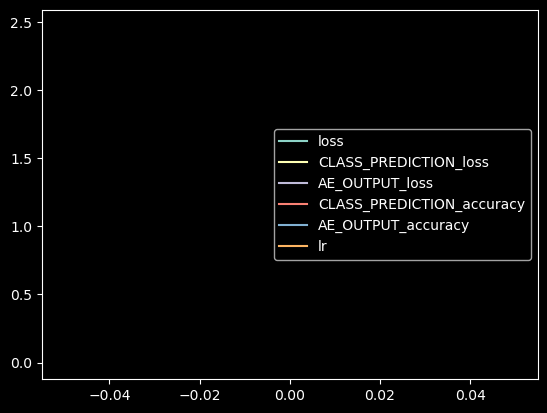

In [61]:
Grap_Data = pd.DataFrame(Model_Configure_Total.history)
Grap_Data.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


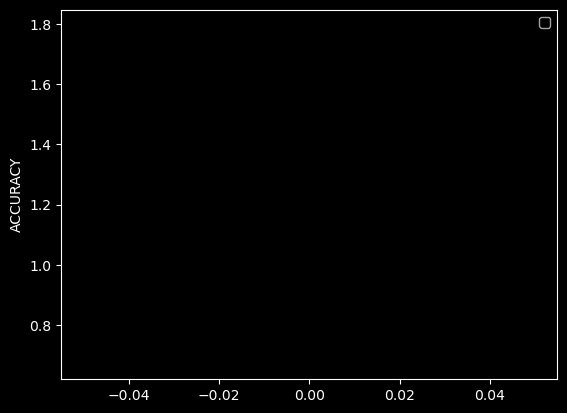

In [62]:
plt.plot(Model_Configure_Total.history["CLASS_PREDICTION_loss"])
plt.plot(Model_Configure_Total.history["AE_OUTPUT_loss"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


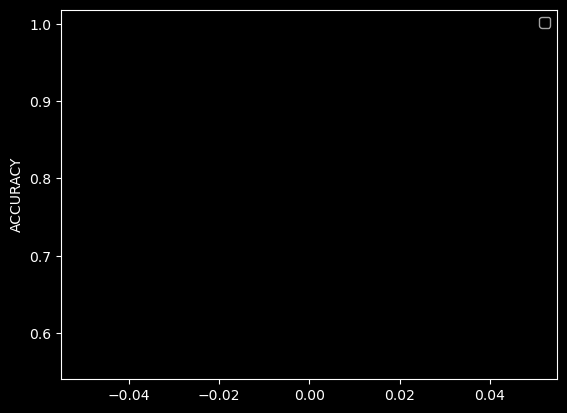

In [63]:
plt.plot(Model_Configure_Total.history["CLASS_PREDICTION_accuracy"])
plt.plot(Model_Configure_Total.history["AE_OUTPUT_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [64]:
Test_Prediction = Configure_Model(Y_S_Train_Img[0:10])
print(type(Test_Prediction))

<class 'list'>


In [65]:
print(Test_Prediction[0])

tf.Tensor(
[[1.70154162e-02 9.20696929e-03 1.15405014e-02 4.53305617e-02
  1.51727526e-02 1.49286687e-02 1.62748080e-02 4.04659696e-02
  2.72251457e-01 8.54677558e-02 5.21476269e-02 1.11802202e-02
  3.61669473e-02 2.25763246e-02 4.06288356e-02 2.11910754e-02
  9.73709486e-03 2.99516525e-02 6.59528561e-03 1.35930292e-02
  4.41129580e-02 4.97157350e-02 2.30425270e-03 6.26322627e-02
  6.98118284e-02]
 [3.53550946e-04 8.86758644e-05 8.54979589e-05 5.25738718e-03
  1.49433239e-04 7.72810890e-04 3.91253852e-04 4.85411799e-03
  8.63474548e-01 1.03286512e-01 2.76056351e-03 1.81599302e-04
  1.31446274e-03 1.20740896e-03 1.61141832e-03 4.60690353e-04
  6.70366644e-05 1.22366799e-03 1.14008748e-04 3.72026756e-04
  3.77011346e-03 2.21199705e-03 1.43401812e-05 2.58149975e-03
  3.39533412e-03]
 [5.38787281e-04 1.50953158e-04 1.71130159e-04 8.87004752e-03
  3.01316526e-04 1.46533153e-03 6.00024010e-04 7.07878871e-03
  8.43069673e-01 1.07223921e-01 3.90579971e-03 3.39366496e-04
  2.14111595e-03 2.0568

In [66]:
print(Test_Prediction[0].argmax(axis=-1)) # this is first class(label) prediction

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'argmax'

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'argmax'

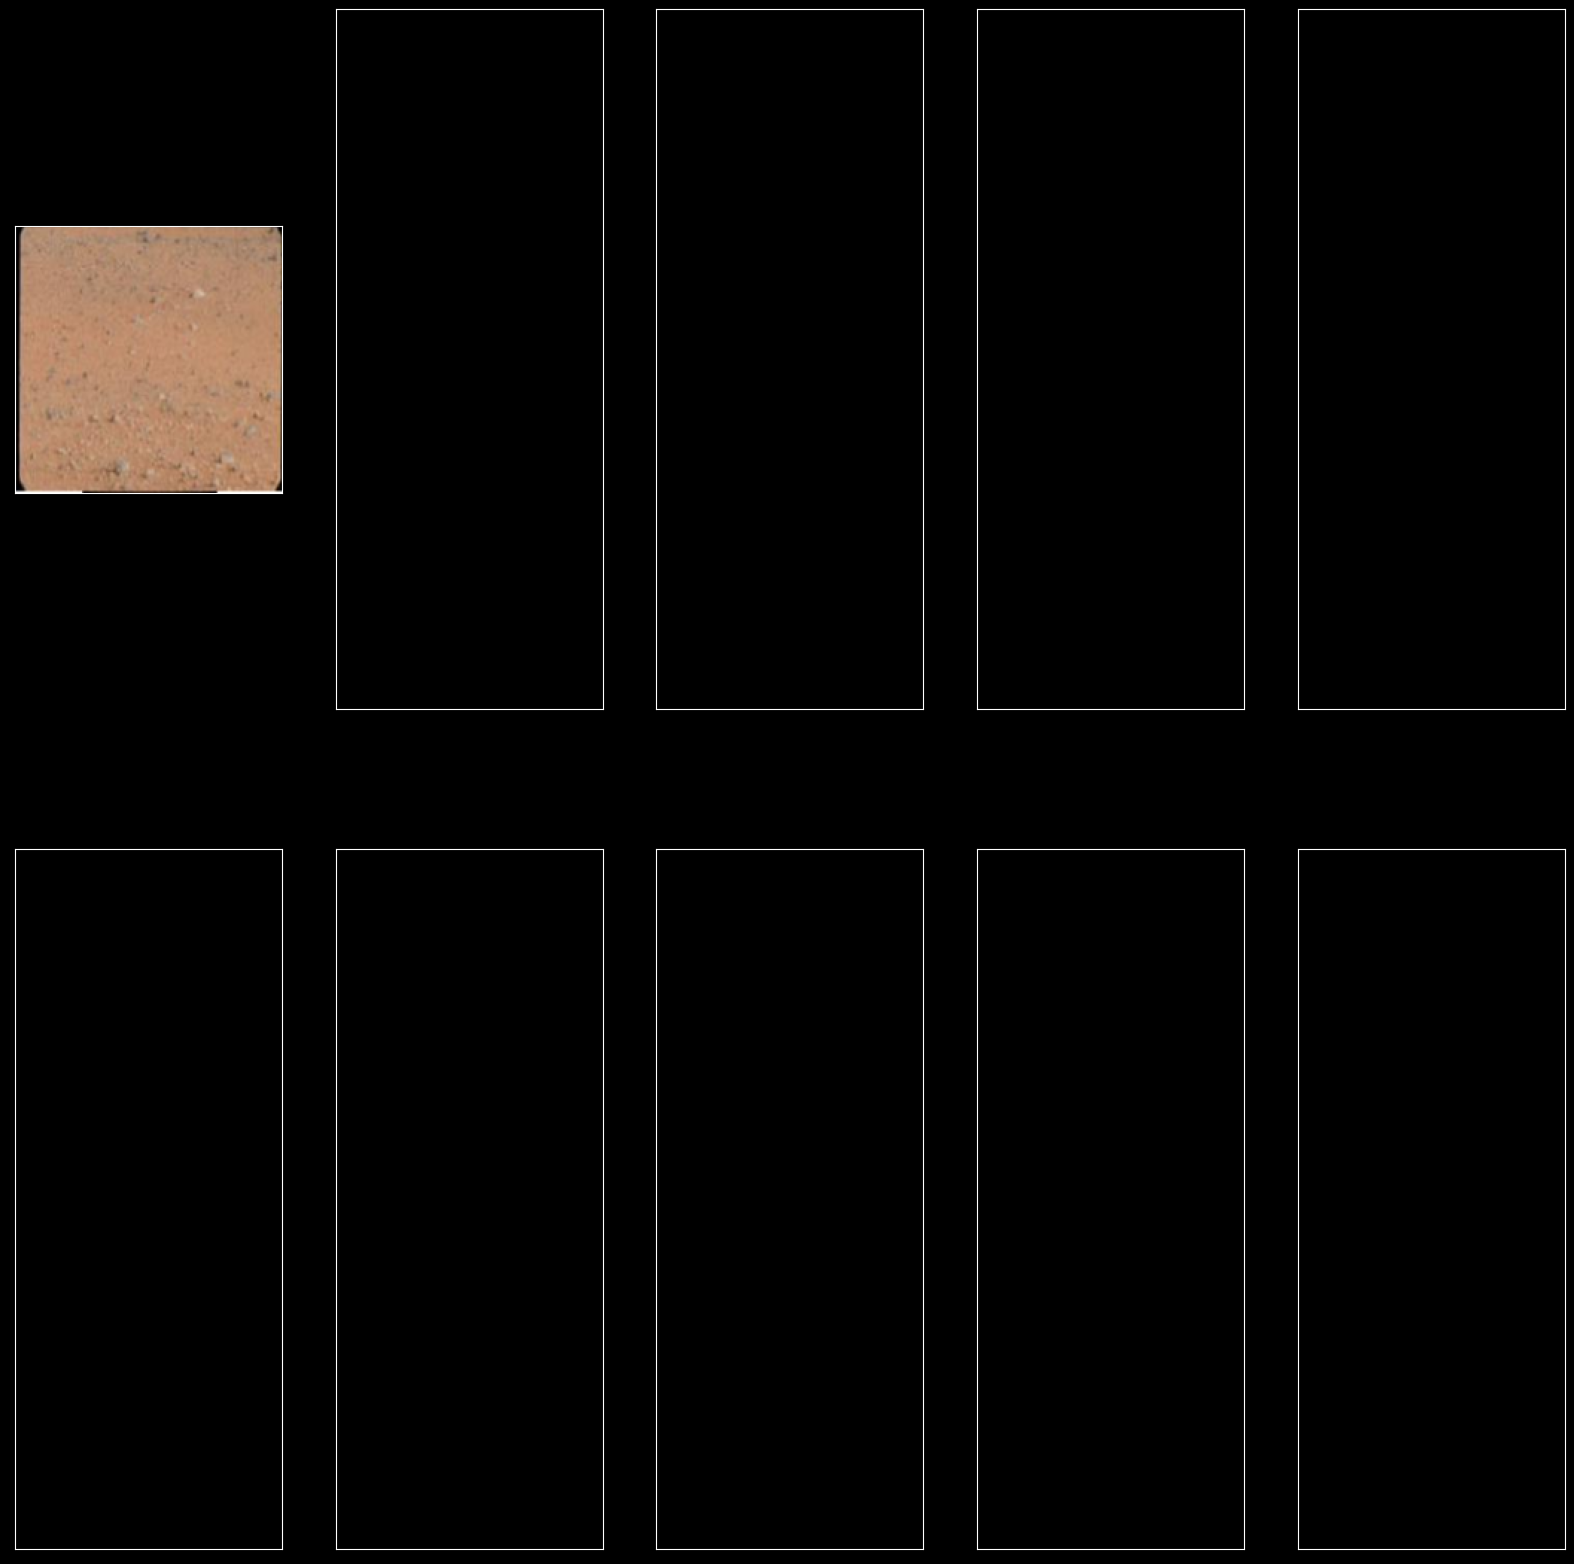

In [ ]:
fig, axes = plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(Transformed_Y_Train[i])
    ax.set_title(f"PREDICTION:{Test_Prediction[0].argmax(axis=-1)[i]}")
plt.tight_layout()
plt.show()

In [ ]:
Transformed_Y_Test = []
Transformed_Y_Test_Labels = []

for Y_image, Y_labels in zip(X_Test.JPG,X_Test.CATEGORY):
    
    Y_image = cv2.cvtColor(cv2.imread(Y_image),cv2.COLOR_BGR2RGB)
    Y_image = cv2.resize(Y_image,(180,180))
    Y_image = Y_image / 255.0
    Transformed_Y_Test.append(Y_image)
    Transformed_Y_Test_Labels.append(Y_labels)
Y_S_Test_Img = np.array(Transformed_Y_Test)
Y_S_Test_Labels = to_categorical(Transformed_Y_Test_Labels)
Other_Test_Prediction = Configure_Model.predict(Y_S_Test_Img[0:10])

In [ ]:
fig, axes = plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(Transformed_Y_Test[i])
    ax.set_title(f"PREDICTION:{Other_Test_Prediction[0].argmax(axis=-1)[i]}")
plt.tight_layout()
plt.show()

In [ ]:
print("NORMAL")
plt.imshow(X_AE_Train[0])
plt.show()
print("Auto Encoder")
plt.imshow(Test_Prediction[1][1])

In [ ]:
print("NORMAL")
plt.imshow(Y_S_Test_Img[0])
plt.show()
print("Auto Encoder")
plt.imshow(Other_Test_Prediction[1][1])